In [138]:
# Student name:Jianheng Chen
# Student number:1005680746
# Course: INF2178
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
# Loading thed dataset
df = pd.read_excel('INF2178_A1_data.xlsx')
df.head(10)
df.tail(10)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
50934,2021-12-31,YMCA of Greater Toronto,15591,YMCA Youth Hotel Program,Youth,Emergency,Motel/Hotel Shelter,COVID-19 Response,27,Room Based Capacity,NaN,NaN,28.0,27.0
50935,2021-12-31,YMCA of Greater Toronto,13451,YMCA Sprott House,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,22,Bed Based Capacity,25.0,22.0,NaN,NaN
50936,2021-12-31,YWCA Toronto,12277,YWCA - Adult Women Shelter,Women,Emergency,Shelter,Base Shelter and Overnight Services System,24,Bed Based Capacity,25.0,24.0,NaN,NaN
50937,2021-12-31,YWCA Toronto,12278,YWCA - Youth Shelter,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,22,Bed Based Capacity,24.0,22.0,NaN,NaN
50938,2021-12-31,YWCA Toronto,14651,YWCA Davenport - Adult,Women,Emergency,Shelter,Base Shelter and Overnight Services System,16,Bed Based Capacity,19.0,16.0,NaN,NaN
50939,2021-12-31,YWCA Toronto,14671,YWCA Davenport - Youth,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN
50940,2021-12-31,Youth Without Shelter,12292,Youth without Shelter Emergency Shelter Program,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN
50941,2021-12-31,Youth Without Shelter,12291,Youth without Shelter Stay In School Program,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN
50942,2021-12-31,YouthLink,14891,YouthLink Emergency Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN
50943,2021-12-31,YouthLink,14911,YouthLink Transitional Program,Mixed Adult,Transitional,Shelter,Base Shelter and Overnight Services System,29,Bed Based Capacity,29.0,29.0,NaN,NaN


In [1]:
# Check dataset info
print(df.info())
print(df.nunique())

NameError: name 'df' is not defined

In [140]:
# Preparing the dataset
df_selected = pd.DataFrame(data = df, columns=['CAPACITY_TYPE', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT',
                           'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS','CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'])
df_selected.head(10)

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0
1,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0
2,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0
3,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0
4,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0
5,Bed Based Capacity,Emergency,6,8.0,6.0,NaN,NaN
6,Room Based Capacity,Emergency,120,NaN,NaN,46.0,44.0
7,Room Based Capacity,Emergency,130,NaN,NaN,46.0,44.0
8,Room Based Capacity,Emergency,153,NaN,NaN,145.0,145.0
9,Room Based Capacity,Emergency,40,NaN,NaN,41.0,40.0


In [141]:
# Since there are a lot of missing values, we need to clean the dataset first
df_selected.isnull().sum()
# From this we can observe that 'Room based capacity' has no Bed information,
# 'Bed based capacity' has no Room information

CAPACITY_TYPE               0
PROGRAM_MODEL               2
SERVICE_USER_COUNT          0
CAPACITY_ACTUAL_BED     18545
OCCUPIED_BEDS           18545
CAPACITY_ACTUAL_ROOM    32399
OCCUPIED_ROOMS          32399
dtype: int64

In [142]:
# Drop the rows where Program model is NA
df_selected = df_selected[df_selected['PROGRAM_MODEL'].notna()]
df_selected.isnull().sum()

CAPACITY_TYPE               0
PROGRAM_MODEL               0
SERVICE_USER_COUNT          0
CAPACITY_ACTUAL_BED     18545
OCCUPIED_BEDS           18545
CAPACITY_ACTUAL_ROOM    32397
OCCUPIED_ROOMS          32397
dtype: int64

In [143]:
# In this case, I choose to fill the Bed and Room data's NAs with 0
df_selected = df_selected.fillna(0)
df_selected.head(10)

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Room Based Capacity,Emergency,74,0.0,0.0,29.0,26.0
1,Room Based Capacity,Emergency,3,0.0,0.0,3.0,3.0
2,Room Based Capacity,Emergency,24,0.0,0.0,28.0,23.0
3,Room Based Capacity,Emergency,25,0.0,0.0,17.0,17.0
4,Room Based Capacity,Emergency,13,0.0,0.0,14.0,13.0
5,Bed Based Capacity,Emergency,6,8.0,6.0,0.0,0.0
6,Room Based Capacity,Emergency,120,0.0,0.0,46.0,44.0
7,Room Based Capacity,Emergency,130,0.0,0.0,46.0,44.0
8,Room Based Capacity,Emergency,153,0.0,0.0,145.0,145.0
9,Room Based Capacity,Emergency,40,0.0,0.0,41.0,40.0


In [144]:
# Before conducting the t-test, we need to calculate the 
# occupancy rate and create new variables
df_selected['BED_OCCUPANCY'] = df_selected['OCCUPIED_BEDS']/df_selected['CAPACITY_ACTUAL_BED']
df_selected['ROOM_OCCUPANCY'] = df_selected['OCCUPIED_ROOMS']/df_selected['CAPACITY_ACTUAL_ROOM']
df_selected.head(10)

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,BED_OCCUPANCY,ROOM_OCCUPANCY
0,Room Based Capacity,Emergency,74,0.0,0.0,29.0,26.0,NaN,0.896552
1,Room Based Capacity,Emergency,3,0.0,0.0,3.0,3.0,NaN,1.000000
2,Room Based Capacity,Emergency,24,0.0,0.0,28.0,23.0,NaN,0.821429
3,Room Based Capacity,Emergency,25,0.0,0.0,17.0,17.0,NaN,1.000000
4,Room Based Capacity,Emergency,13,0.0,0.0,14.0,13.0,NaN,0.928571
5,Bed Based Capacity,Emergency,6,8.0,6.0,0.0,0.0,0.75,NaN
6,Room Based Capacity,Emergency,120,0.0,0.0,46.0,44.0,NaN,0.956522
7,Room Based Capacity,Emergency,130,0.0,0.0,46.0,44.0,NaN,0.956522
8,Room Based Capacity,Emergency,153,0.0,0.0,145.0,145.0,NaN,1.000000
9,Room Based Capacity,Emergency,40,0.0,0.0,41.0,40.0,NaN,0.975610


In [145]:
# Combine the two colums
df_selected['OCCUPANCY_RATE'] = np.where(df_selected['CAPACITY_TYPE'] == 'Room Based Capacity', 
                                         df_selected['ROOM_OCCUPANCY'], df_selected['BED_OCCUPANCY'])
df_selected.head(10)

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,BED_OCCUPANCY,ROOM_OCCUPANCY,OCCUPANCY_RATE
0,Room Based Capacity,Emergency,74,0.0,0.0,29.0,26.0,NaN,0.896552,0.896552
1,Room Based Capacity,Emergency,3,0.0,0.0,3.0,3.0,NaN,1.000000,1.000000
2,Room Based Capacity,Emergency,24,0.0,0.0,28.0,23.0,NaN,0.821429,0.821429
3,Room Based Capacity,Emergency,25,0.0,0.0,17.0,17.0,NaN,1.000000,1.000000
4,Room Based Capacity,Emergency,13,0.0,0.0,14.0,13.0,NaN,0.928571,0.928571
5,Bed Based Capacity,Emergency,6,8.0,6.0,0.0,0.0,0.75,NaN,0.750000
6,Room Based Capacity,Emergency,120,0.0,0.0,46.0,44.0,NaN,0.956522,0.956522
7,Room Based Capacity,Emergency,130,0.0,0.0,46.0,44.0,NaN,0.956522,0.956522
8,Room Based Capacity,Emergency,153,0.0,0.0,145.0,145.0,NaN,1.000000,1.000000
9,Room Based Capacity,Emergency,40,0.0,0.0,41.0,40.0,NaN,0.975610,0.975610


In [146]:
# According to the instruction, to study the difference between different
# occupancies based on types, based on the dataset, a 2 sample t-test should be used

x = df_selected['BED_OCCUPANCY'].dropna()
# Gaussian distributed data with mean = 9.5 and var = 1
y = df_selected['ROOM_OCCUPANCY'].dropna()

## Using the internal function from SciPy Package
t_stat, p_val = stats.ttest_ind(x, y)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

# As shown in result,the p-value is greater than 0.05,
# We will conclude that there is a significant difference between
# the bed and room 

t-statistic = -4.845858377006688
p-value = 1.2643561358159322e-06


In [147]:
# Welch's t-test
# Using SciPy Package
t_stat, p_val = stats.ttest_ind(x, y, equal_var = False)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))
# As shown in result,the p-value is greater than 0.05,
# We will conclude that there is a significant difference between
# the bed and room

t-statistic = -4.491108081297825
p-value = 7.1112242415027885e-06


In [148]:
# Except the Capacity type, Program model can also be considered
# as a valid categorical varibale to conduict t-tests
# A 2 sample t-test will be
x1 = df_selected[df_selected['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE']
# Gaussian distributed data with mean = 9.5 and var = 1
y1 = df_selected[df_selected['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE']

## Using the internal function from SciPy Package
t_stat, p_val = stats.ttest_ind(x1, y1)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

# As shown in result,the p-value is smaller than 0.05,
# We will conclude that there is no significant difference between
# the emergency and transitional 

t-statistic = 39.07496980654136
p-value = 0.0


In [149]:
# Welch's t-test
# Using SciPy Package
t_stat, p_val = stats.ttest_ind(x1, y1, equal_var = False)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))
# As shown in result,the p-value is smaller than 0.05,
# We will conclude that there is no significant difference between
# the emergency and transitional 

t-statistic = 40.981115372199206
p-value = 0.0


In [150]:
# EDA
# summary statistic code from lecture
def get_summary_statistics(dataset):

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('Setosa summary statistics')
    print('\n\nSetosa summary statistics')

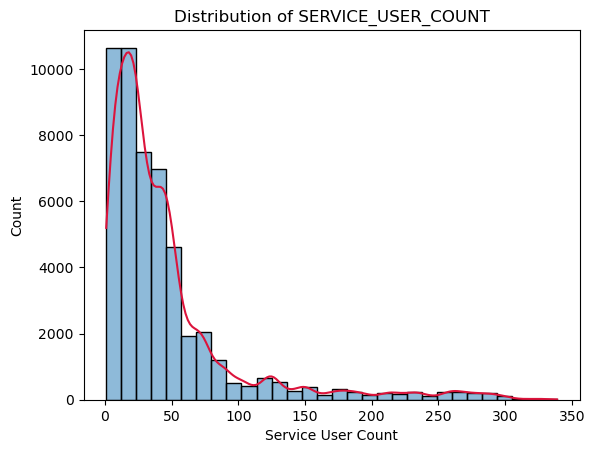

In [151]:
# See the distribution of service user count
pt1 = sns.histplot(data = df_selected, x="SERVICE_USER_COUNT", bins = 30, kde = True)
pt1.lines[0].set_color('crimson')

plt.xlabel('Service User Count')
plt.ylabel('Count')
plt.title('Distribution of SERVICE_USER_COUNT')
plt.show()

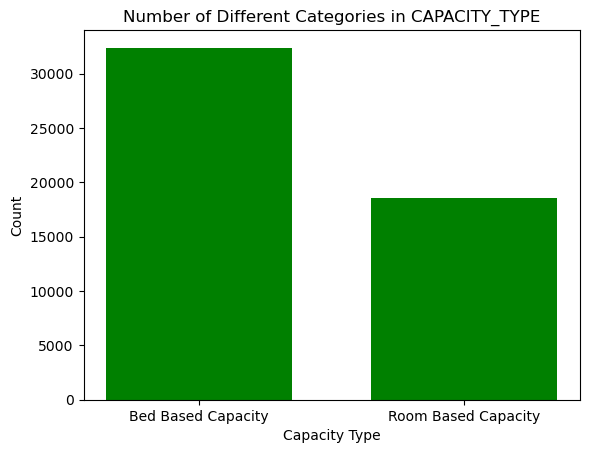

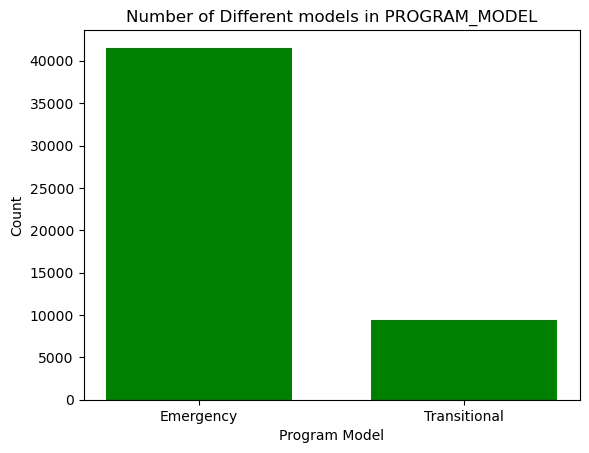

In [152]:
# For the 2 categorical variables, check the count of different categories
plt.bar(df_selected['CAPACITY_TYPE'].value_counts().index, df_selected['CAPACITY_TYPE'].value_counts().values, 
        color='green', width= 0.7)
plt.xlabel('Capacity Type')
plt.ylabel('Count')
plt.title('Number of Different Categories in CAPACITY_TYPE')
plt.show()

plt.bar(df_selected['PROGRAM_MODEL'].value_counts().index, df_selected['PROGRAM_MODEL'].value_counts().values, 
        color='green', width= 0.7)
plt.xlabel('Program Model')
plt.ylabel('Count')
plt.title('Number of Different models in PROGRAM_MODEL')
plt.show()

In [153]:
# The data solvly based on the number of beds/rooms is 
# ineffective in understanding the occupancy situatuion
# So we will get summary statistics for only occupancy columns
print('\n\nBed Occupancy summary statistics')
get_summary_statistics(df_selected['BED_OCCUPANCY'].dropna())

print('\n\nRoom Occupancy summary statistics')
get_summary_statistics(df_selected['ROOM_OCCUPANCY'].dropna())
# There should be outliers existing as the room occupancy has max greater than 1

print('\n\nOverall Occupancy summary statistics')
get_summary_statistics(df_selected['OCCUPANCY_RATE'])



Bed Occupancy summary statistics
Min: 0.02
Mean: 0.93
Max: 1.0
25th percentile: 0.9
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.1
Setosa summary statistics


Setosa summary statistics


Room Occupancy summary statistics
Min: 0.01
Mean: 0.93
Max: 1.01
25th percentile: 0.96
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.04
Setosa summary statistics


Setosa summary statistics


Overall Occupancy summary statistics
Min: 0.01
Mean: 0.93
Max: 1.01
25th percentile: 0.92
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.08
Setosa summary statistics


Setosa summary statistics


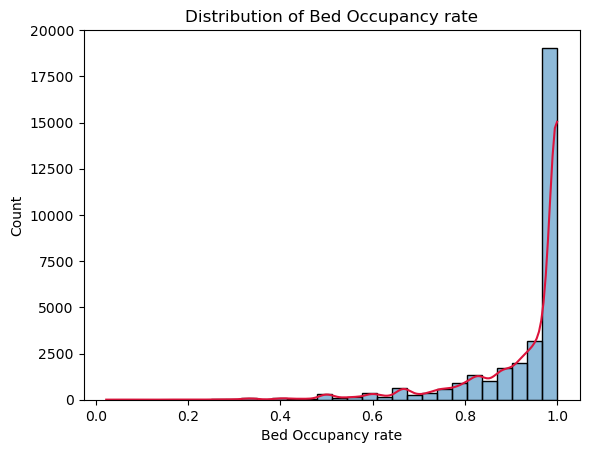

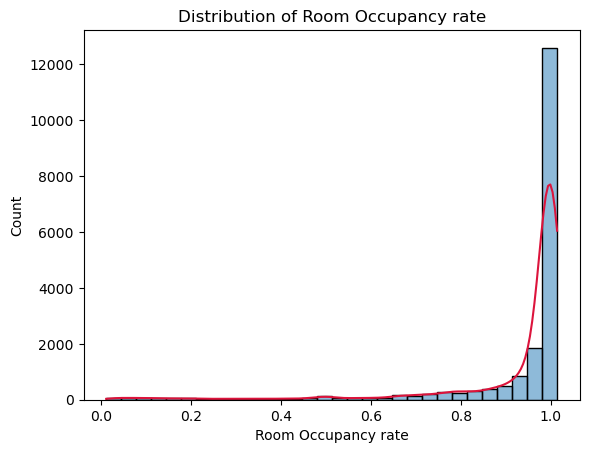

In [154]:
# Distribution of different Occupancies
pt2 = sns.histplot(df_selected['BED_OCCUPANCY'].dropna(), bins = 30, kde =True)
pt2.lines[0].set_color('crimson')

plt.xlabel('Bed Occupancy rate')
plt.ylabel('Count')
plt.title('Distribution of Bed Occupancy rate')
plt.show()

pt3 = sns.histplot(df_selected['ROOM_OCCUPANCY'].dropna(), bins = 30, kde =True)
pt3.lines[0].set_color('crimson')

plt.xlabel('Room Occupancy rate')
plt.ylabel('Count')
plt.title('Distribution of Room Occupancy rate')
plt.show()

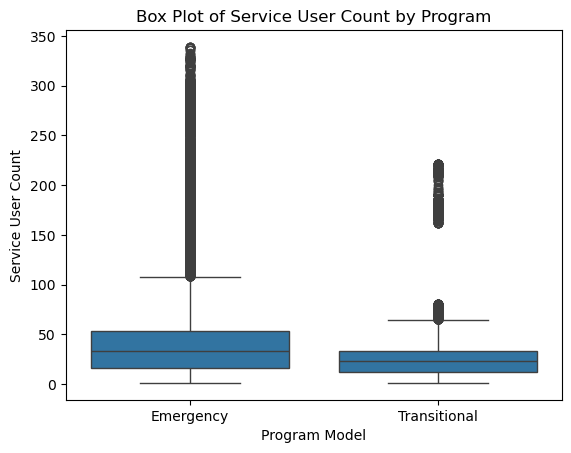

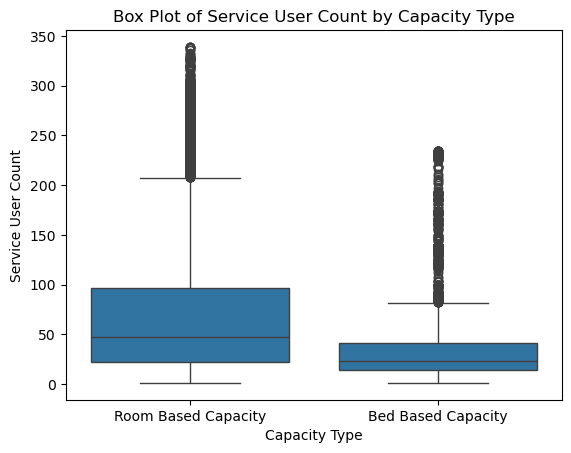

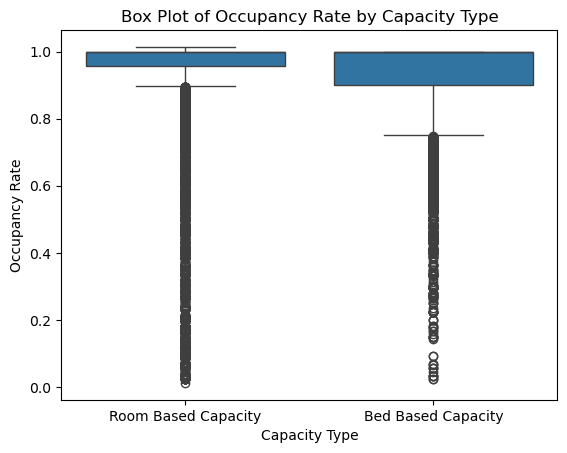

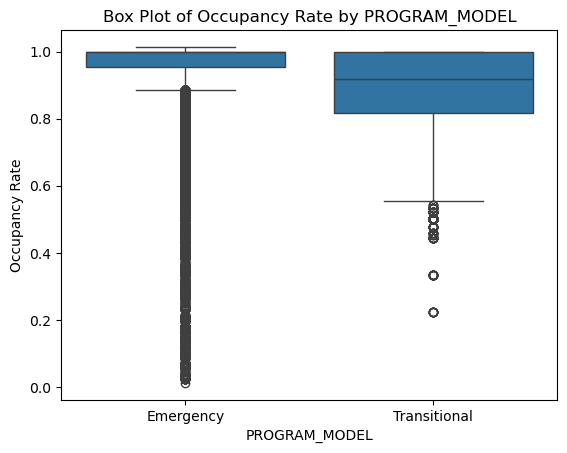

In [155]:
# Box plots
sns.boxplot(x='PROGRAM_MODEL', y='SERVICE_USER_COUNT', data=df_selected)
plt.title('Box Plot of Service User Count by Program')
plt.xlabel('Program Model')
plt.ylabel('Service User Count')
plt.show()

sns.boxplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT', data=df_selected)
plt.title('Box Plot of Service User Count by Capacity Type')
plt.xlabel('Capacity Type')
plt.ylabel('Service User Count')
plt.show()

sns.boxplot(x='CAPACITY_TYPE', y='OCCUPANCY_RATE', data=df_selected)
plt.title('Box Plot of Occupancy Rate by Capacity Type')
plt.xlabel('Capacity Type')
plt.ylabel('Occupancy Rate')
plt.show()

sns.boxplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE', data=df_selected)
plt.title('Box Plot of Occupancy Rate by PROGRAM_MODEL')
plt.xlabel('PROGRAM_MODEL')
plt.ylabel('Occupancy Rate')
plt.show()
# There are a lot of outliers, obsevrable in the disrtitbion plot

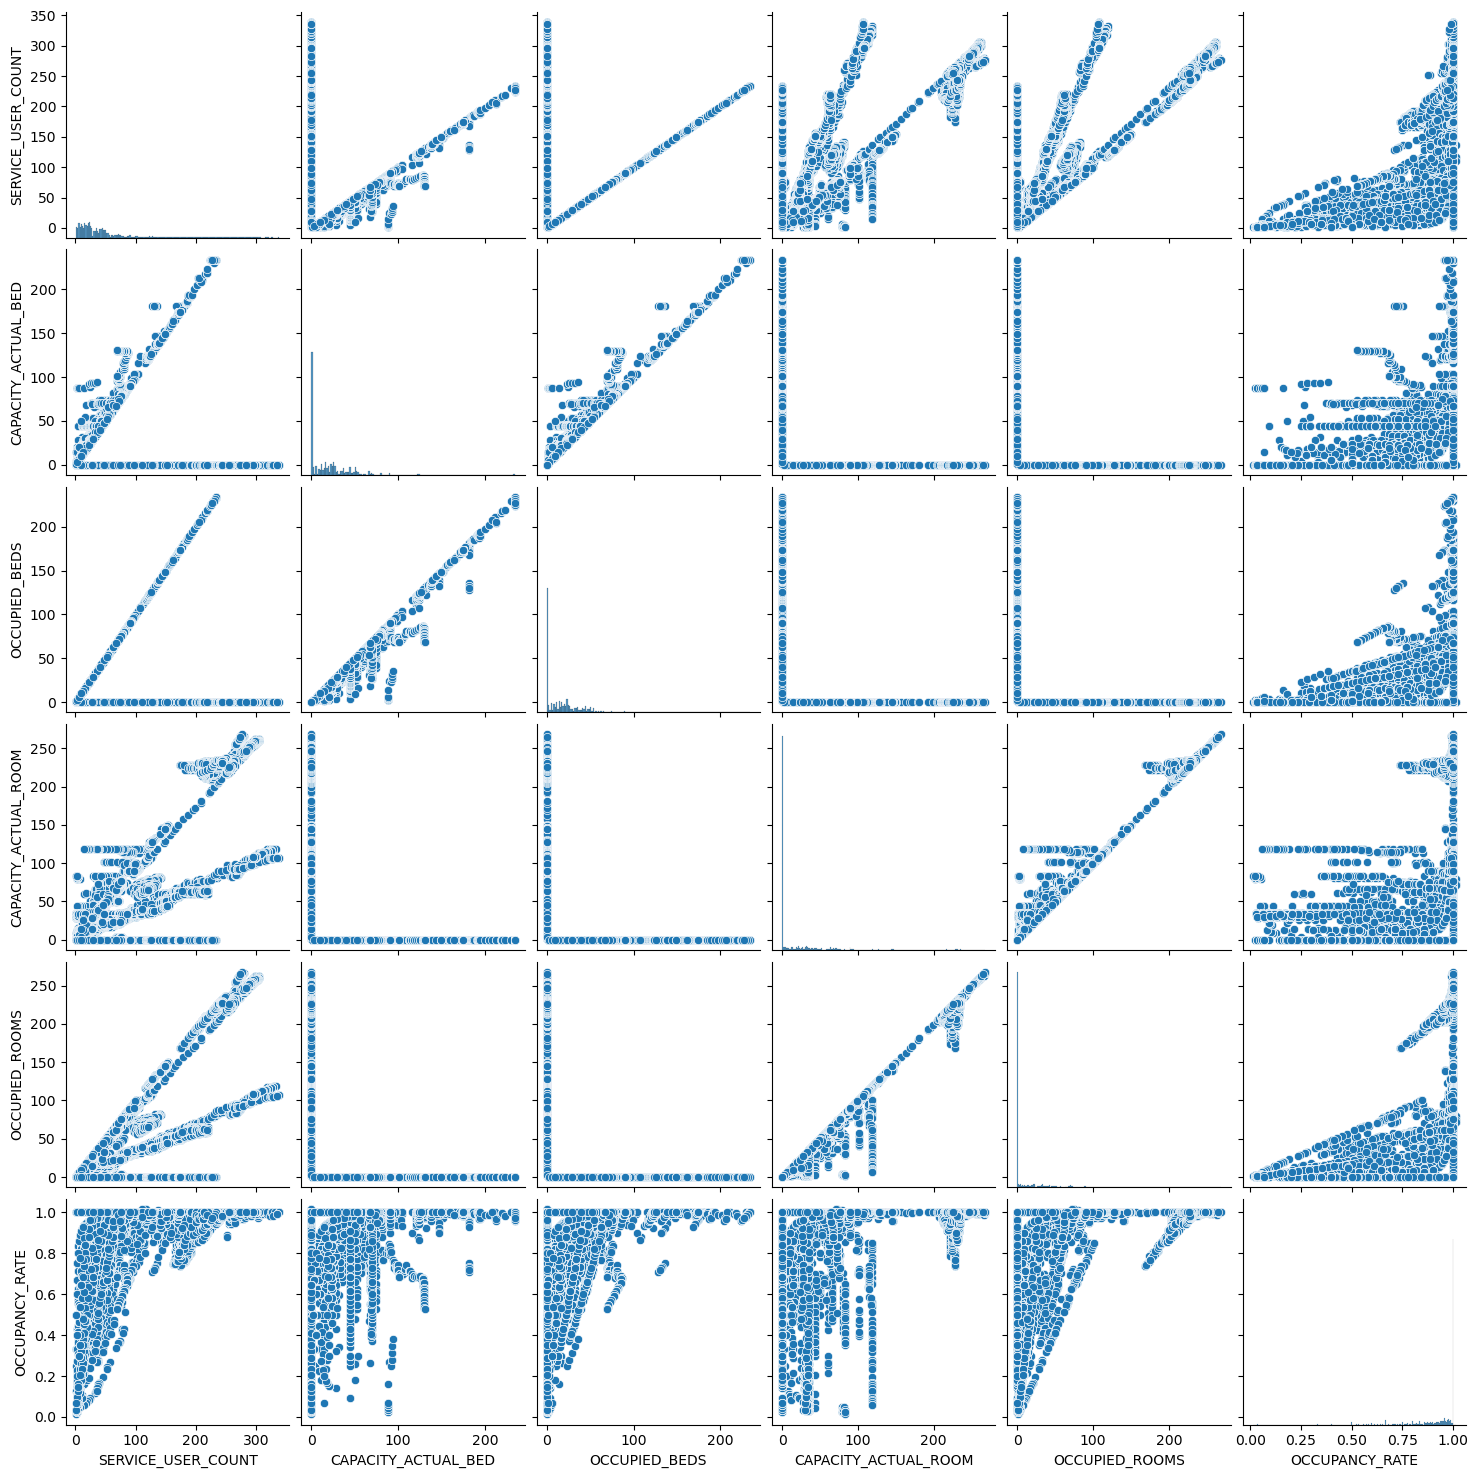

In [156]:
# Bivariate Analysis
sns.pairplot(data = df_selected.drop(['PROGRAM_MODEL','CAPACITY_TYPE', 'BED_OCCUPANCY','ROOM_OCCUPANCY'],axis=1))
plt.show()